In [1]:
# -*- coding: utf-8 -*-

In [2]:
%%!
pip install --trusted-host pypi.org ipython-sql

['Requirement already satisfied: ipython-sql in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (0.3.9)',
 'Requirement already satisfied: sqlalchemy>=0.6.7 in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from ipython-sql) (1.3.16)',
 'Requirement already satisfied: sqlparse in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from ipython-sql) (0.3.1)',
 'Requirement already satisfied: ipython>=1.0 in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from ipython-sql) (7.13.0)',
 'Requirement already satisfied: ipython-genutils>=0.1.0 in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from ipython-sql) (0.2.0)',
 'Requirement already satisfied: prettytable in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from ipython-sql) (0.7.2)',
 'Requirement already satisfied: six in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from ipython-sql) (1.14.0)',
 'Requirement already satisfied: pygments in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from ipython>=1.0->ipython-sql)

In [3]:
%%!
pip install wget

['Requirement already satisfied: wget in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (3.2)',
 'WARNING: You are using pip version 20.0.2; however, version 20.1.1 is available.',
 "You should consider upgrading via the 'c:\\osgeo4~1\\bin\\python3.exe -m pip install --upgrade pip' command."]

In [4]:
%load_ext sql

In [5]:
from IPython.core.display import HTML, SVG
import pandas as pd
import numpy as np
import IPython 
from ipywidgets import Layout
from ipywidgets import widgets
from IPython.display import display

In [6]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from pandas.plotting import table

In [7]:
def read_csv(filename):
    df = pd.read_csv(filename)
    return df

In [8]:
csv_covid = read_csv(r'C:\Windows\System32\0 SIG\Australian_Cases.csv')
print(csv_covid)

     OBJECTID  LGA_CODE19                   LGA_NAME19  \
0           1       10050                   Albury (C)   
1           2       10130        Armidale Regional (A)   
2           3       10250                  Ballina (A)   
3           4       10300                Balranald (A)   
4           5       10470        Bathurst Regional (A)   
..        ...         ...                          ...   
539       540       74660              West Arnhem (R)   
540       541       74680                West Daly (R)   
541       542       79399            Unincorporated NT   
542       543       89399           Unincorporated ACT   
543       544       99399  Unincorp. Other Territories   

                       STE_NAME16  AREASQKM19  Population  Cases  \
0                 New South Wales    305.9459     53767.0    8.0   
1                 New South Wales   8620.6990     30707.0    4.0   
2                 New South Wales    484.9389     44208.0    8.0   
3                 New South Wal

In [9]:
csv_covid.head()

,OBJECTID,LGA_CODE19,LGA_NAME19,STE_NAME16,AREASQKM19,Population,Cases,LastUpdated,Shape__Area,Shape__Length,Cases_Str,PopNorm,Nomes,Casos
0,1,10050,Albury (C),New South Wales,305.9459,53767.0,8.0,2020/04/15 00:00:00+00,0.030587,1.260390,8,6720.0,Albury,8.0
1,2,10130,Armidale Regional (A),New South Wales,8620.6990,30707.0,4.0,2020/04/17 00:00:00+00,0.808783,6.883743,4,7676.0,Armidale Regional,4.0
2,3,10250,Ballina (A),New South Wales,484.9389,44208.0,8.0,2020/04/14 00:00:00+00,0.044858,1.422609,8,5526.0,Ballina,8.0
3,4,10300,Balranald (A),New South Wales,21690.6753,2340.0,NaN,1970/01/01 00:00:00+00,2.115393,11.197395,NaN,NaN,Balranald,0.0
4,5,10470,Bathurst Regional (A),New South Wales,3817.8646,43206.0,9.0,2020/03/29 00:00:00+00,0.370170,5.242297,9,4800.0,Bathurst Regional,9.0


In [10]:
csv_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID       544 non-null    int64  
 1   LGA_CODE19     544 non-null    int64  
 2   LGA_NAME19     544 non-null    object 
 3   STE_NAME16     544 non-null    object 
 4   AREASQKM19     544 non-null    float64
 5   Population     543 non-null    float64
 6   Cases          225 non-null    float64
 7   LastUpdated    544 non-null    object 
 8   Shape__Area    544 non-null    float64
 9   Shape__Length  544 non-null    float64
 10  Cases_Str      225 non-null    object 
 11  PopNorm        225 non-null    float64
 12  Nomes          544 non-null    object 
 13  Casos          544 non-null    float64
dtypes: float64(7), int64(2), object(5)
memory usage: 59.6+ KB


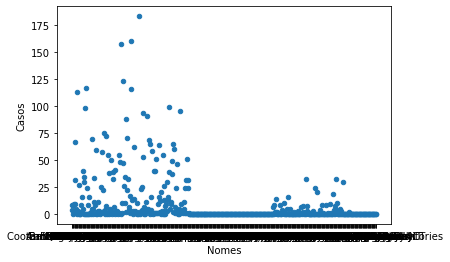

In [11]:
df = DataFrame(csv_covid,columns=['Nomes','Casos'])

df.plot(x ='Nomes', y='Casos', kind = 'scatter')
plt.show()

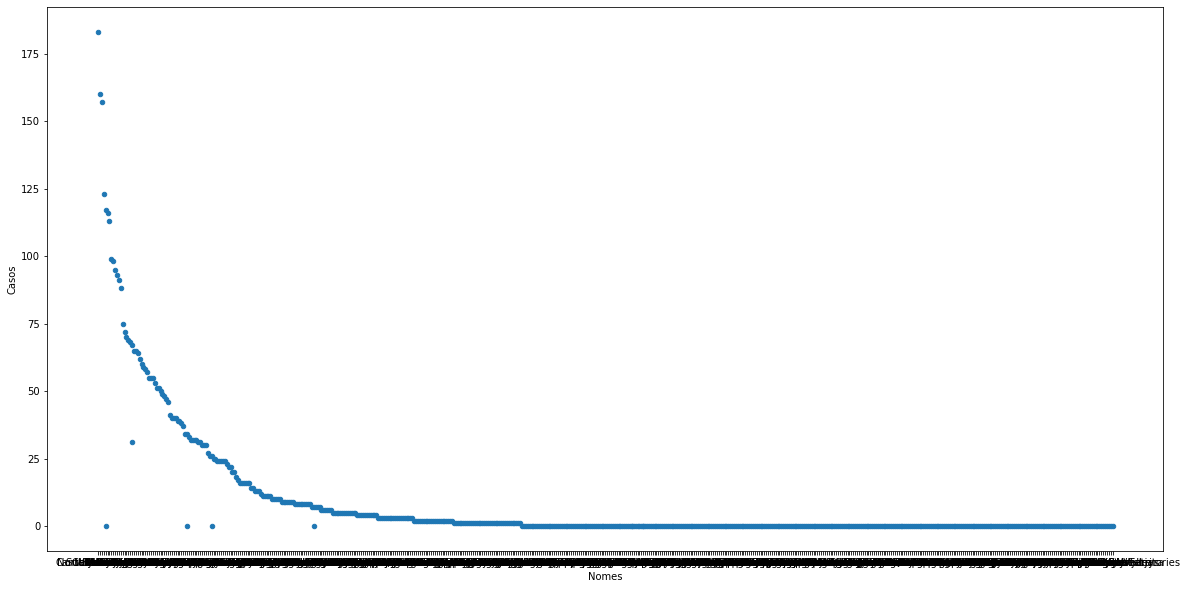

In [12]:
df1 = df.sort_values(by=['Casos'], ascending=False)

df1.plot(x ='Nomes', y='Casos', kind = 'scatter', figsize=(20,10))
plt.show()

In [13]:
dfs = df.sort_values(by=['Casos'], ascending=False).reset_index(drop=True)


df2 = dfs.head(10)

print(df2)

df3 = dfs.head(22)

print(df3)

df4 = dfs.iloc[22:,-1]
#['Casos']
print(df4)


df4s = df4.sum()

print(df4s)

data = {'Casos': [df4s]} 
  
df4d = pd.DataFrame(data)

df4d['Nomes'] = 'Outras'

print(df4d)

dfs = df3.append(df4d).reset_index(drop=True)

print(dfs)

                  Nomes  Casos
0              Waverley  183.0
1                Sydney  160.0
2      Northern Beaches  157.0
3               Penrith  123.0
4         Central Coast  117.0
5      Sutherland Shire  116.0
6             Blacktown  113.0
7             Melbourne   99.0
8  Canterbury-Bankstown   98.0
9           Stonnington   95.0
                   Nomes  Casos
0               Waverley  183.0
1                 Sydney  160.0
2       Northern Beaches  157.0
3                Penrith  123.0
4          Central Coast  117.0
5       Sutherland Shire  116.0
6              Blacktown  113.0
7              Melbourne   99.0
8   Canterbury-Bankstown   98.0
9            Stonnington   95.0
10             Woollahra   93.0
11               Banyule   91.0
12              Randwick   88.0
13            Inner West   75.0
14           Ku-ring-gai   72.0
15                  Ryde   70.0
16            Cumberland   69.0
17            Boroondara   68.0
18               Bayside   67.0
19              Bri

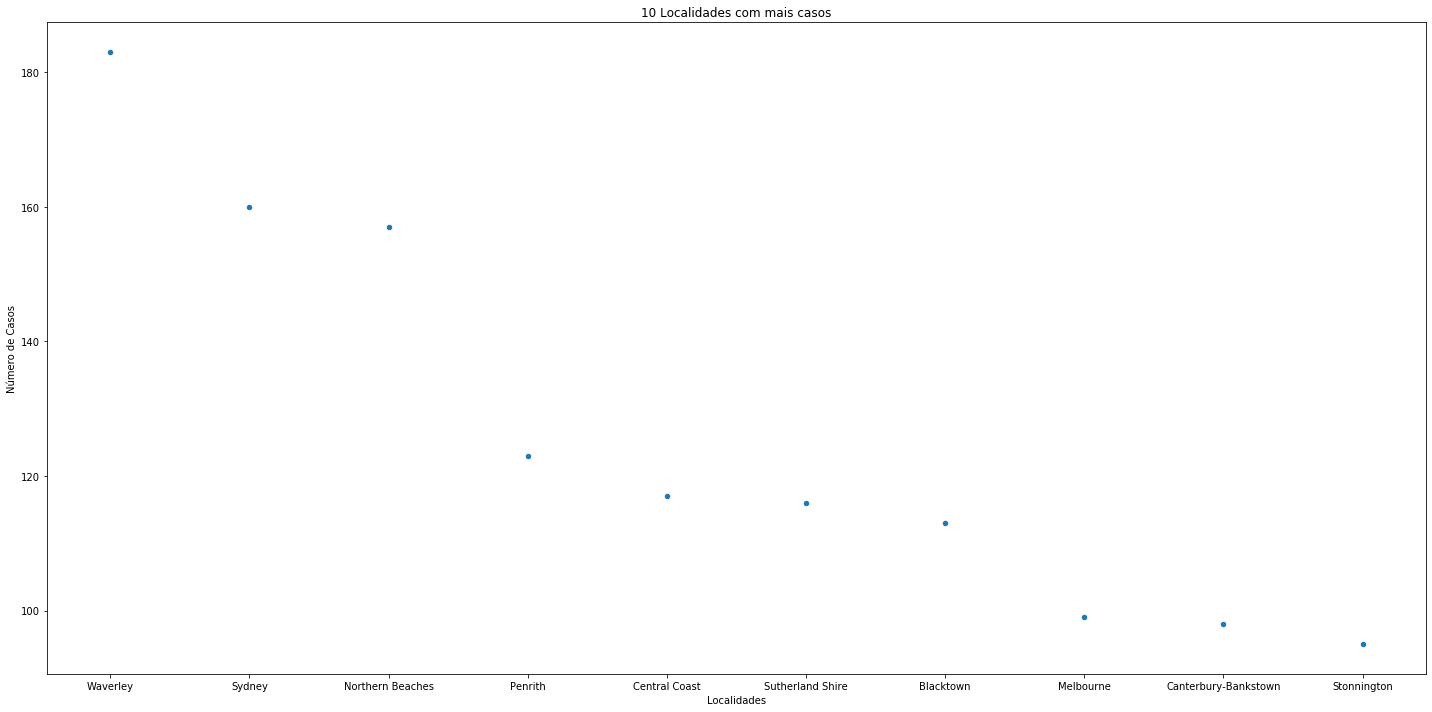

In [14]:
df2.plot(x ='Nomes', y='Casos', kind = 'scatter', figsize=(20,10))

plt.xlabel('Localidades')
plt.ylabel('Número de Casos')
plt.title('10 Localidades com mais casos')
plt.savefig('C:/Windows/System32/0 SIG/Imagens/Australian_Cases_Top10.png', dpi=200, format='png')
plt.tight_layout()

plt.show()

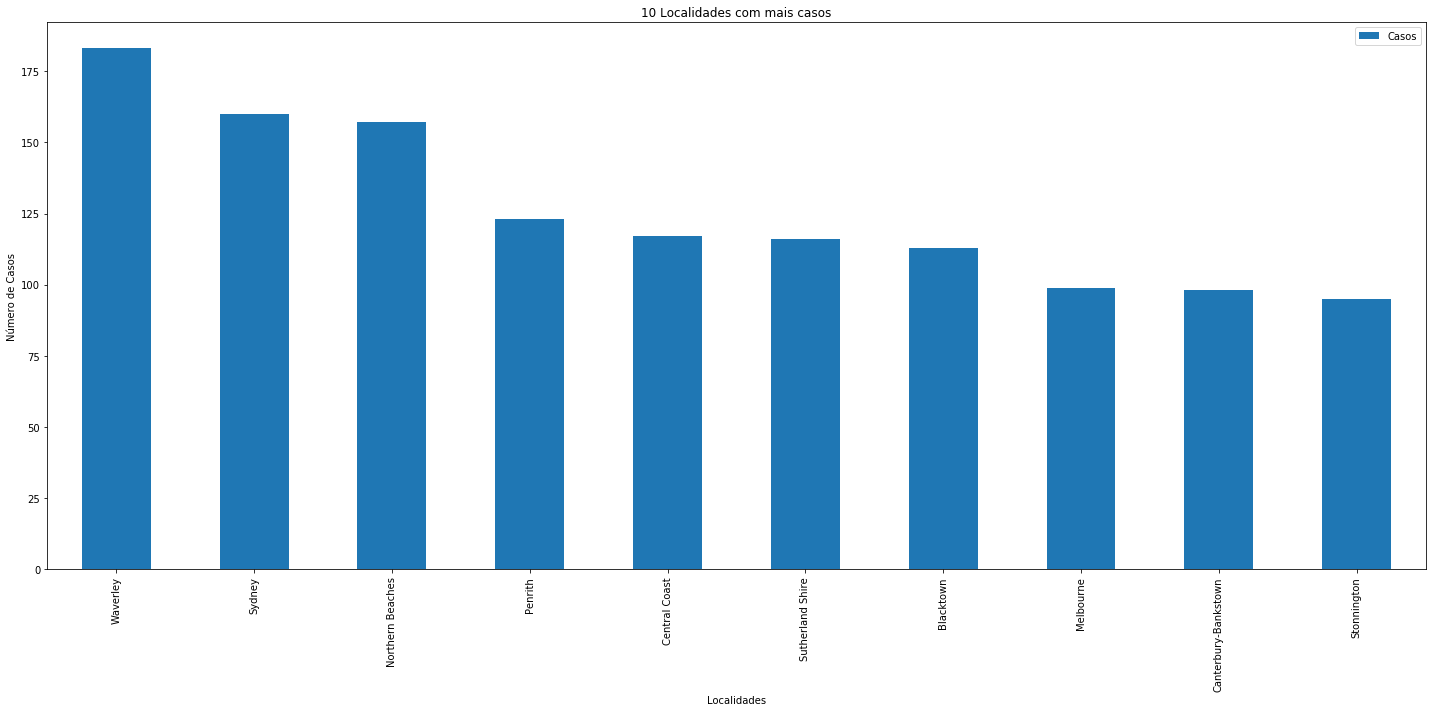

In [15]:
df2.plot.bar(x ='Nomes', y='Casos', figsize=(20,10))

plt.xlabel('Localidades')
plt.ylabel('Número de Casos')
plt.title('10 Localidades com mais casos')
plt.savefig('C:/Windows/System32/0 SIG/Imagens/Australian_Cases_Bar10.png', dpi=200, format='png')
plt.tight_layout()

plt.show()

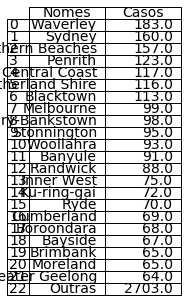

In [16]:
ax2 = plt.subplot(122)
plt.axis('off')
tbl = table(ax2, dfs, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
plt.show()

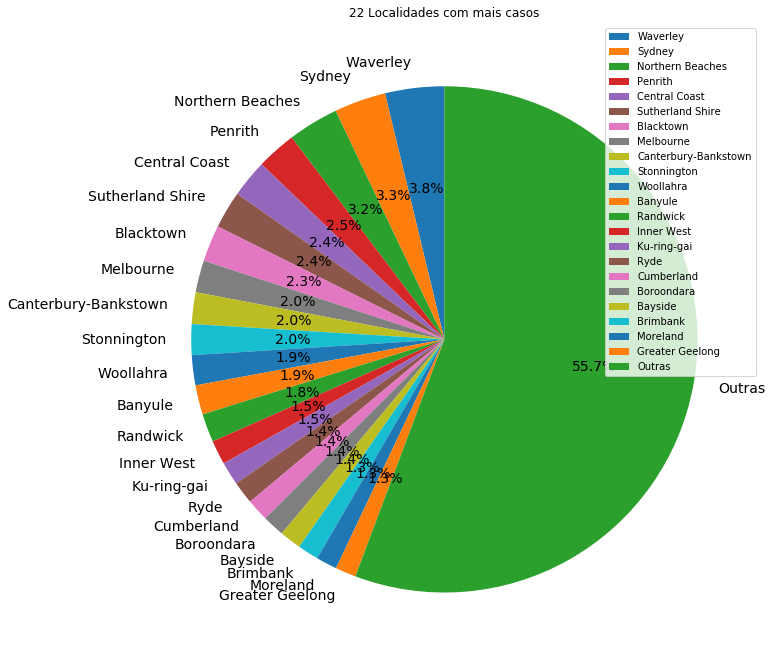

In [17]:
ax1 = plt.subplot(121, aspect='equal')

dfs.plot(kind='pie', y = 'Casos', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=dfs['Nomes'], legend = True, fontsize=14, figsize=(20,10))

plt.ylabel('')
plt.title('22 Localidades com mais casos')
plt.savefig('C:/Windows/System32/0 SIG/Imagens/Australian_Cases_Pie10.png', dpi=200, format='png')
plt.tight_layout()
plt.show()

In [18]:
csv_covid_region = read_csv(r'C:\Windows\System32\0 SIG\Australian_Cases_Region.csv')
print(csv_covid_region)

                     STE_NAME16   Casos
0  Australian Capital Territory     0.0
1               New South Wales  2943.0
2            Northern Territory     0.0
3             Other Territories     0.0
4                    Queensland     0.0
5               South Australia     0.0
6                      Tasmania     0.0
7                      Victoria  1556.0
8             Western Australia   352.0


In [19]:
csv_covid_region.head()

,STE_NAME16,Casos
0,Australian Capital Territory,0.0
1,New South Wales,2943.0
2,Northern Territory,0.0
3,Other Territories,0.0
4,Queensland,0.0


In [20]:
csv_covid_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STE_NAME16  9 non-null      object 
 1   Casos       9 non-null      float64
dtypes: float64(1), object(1)
memory usage: 272.0+ bytes


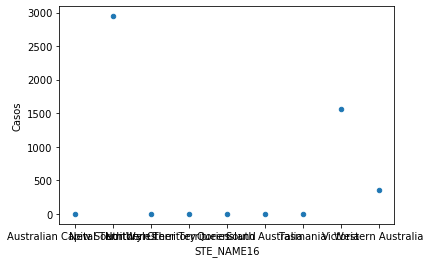

In [21]:
dfr = DataFrame(csv_covid_region,columns=['STE_NAME16','Casos'])

dfr.plot(x ='STE_NAME16', y='Casos', kind = 'scatter')
plt.show()

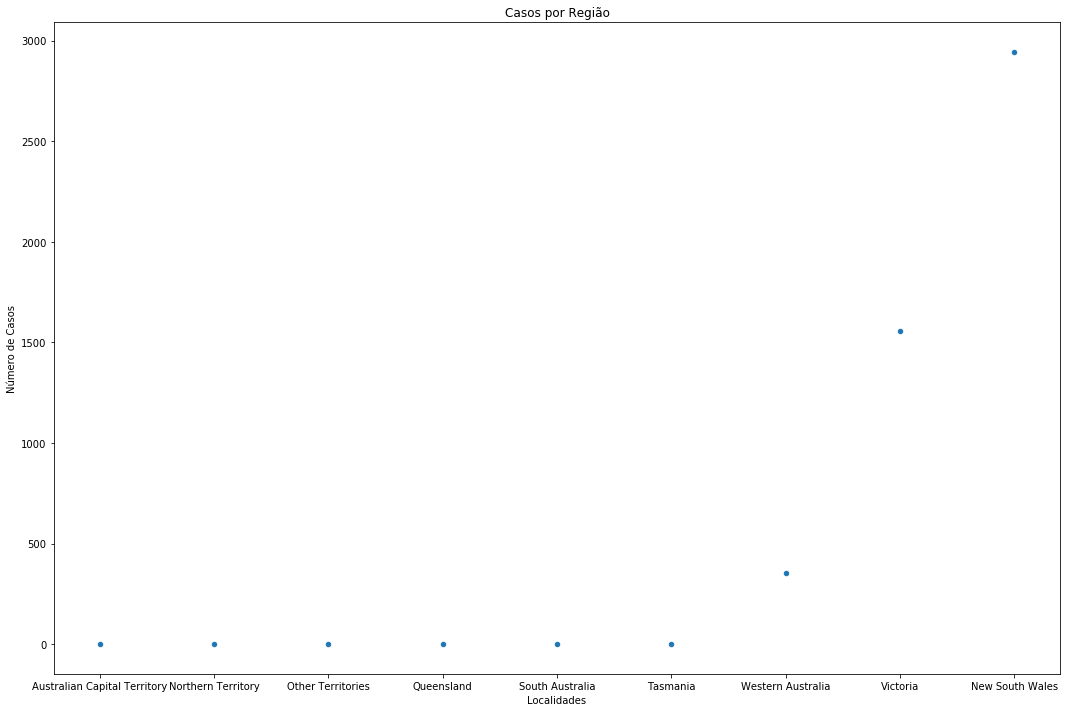

In [22]:
dfr1 = dfr.sort_values(by=['Casos'], ascending=True)

dfr1.plot(x ='STE_NAME16', y='Casos', kind = 'scatter', figsize=(15,10))

plt.xlabel('Localidades')
plt.ylabel('Número de Casos')
plt.title('Casos por Região')
plt.savefig('C:/Windows/System32/0 SIG/Imagens/Australian_Cases_Region_Points.png', dpi=200, format='png')
plt.tight_layout()
plt.show()

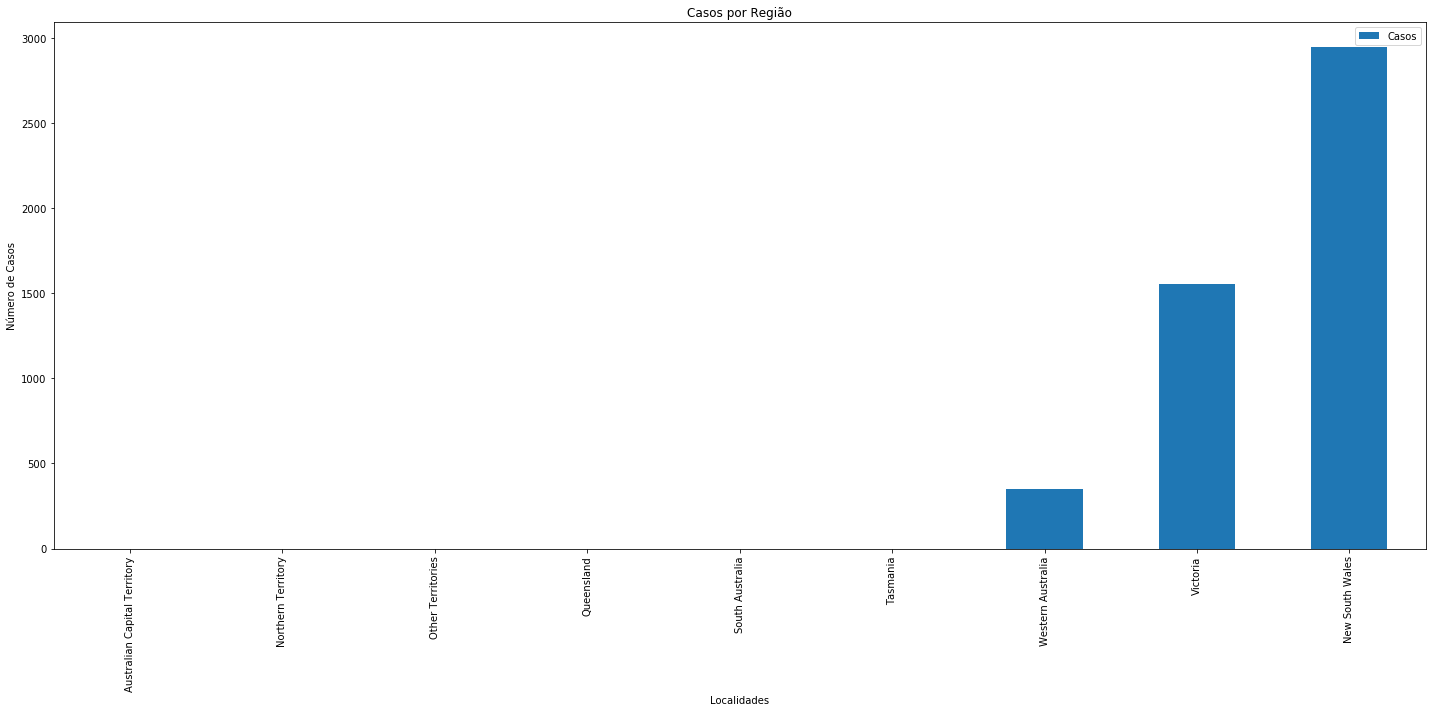

In [23]:
dfr1.plot.bar(x ='STE_NAME16', y='Casos', figsize=(20,10))

plt.xlabel('Localidades')
plt.ylabel('Número de Casos')
plt.title('Casos por Região')
plt.savefig('C:/Windows/System32/0 SIG/Imagens/Australian_Cases_Region_Bar.png', dpi=200, format='png')
plt.tight_layout()

plt.show()

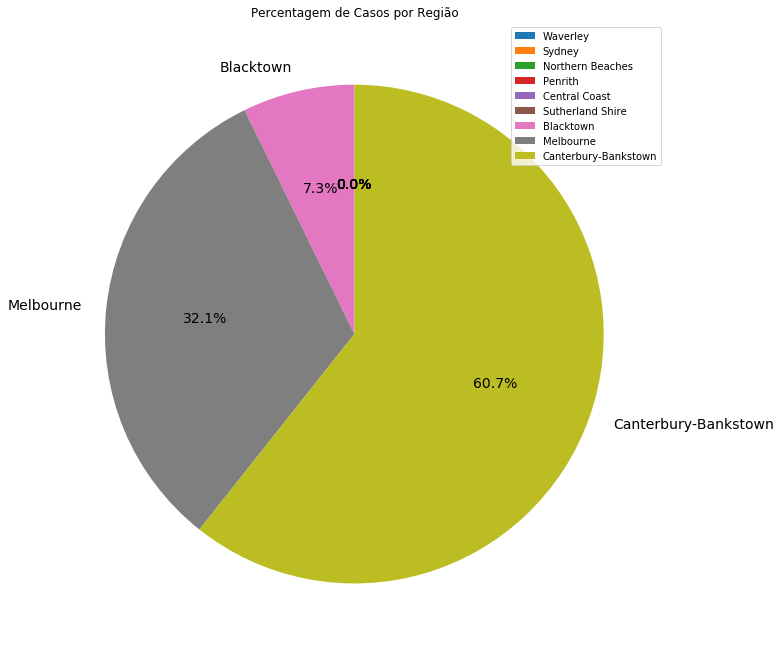

In [24]:
ax1 = plt.subplot(121, aspect='equal')

dfr1.plot(kind='pie', y = 'Casos', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=dfs['Nomes'], legend = True, fontsize=14, figsize=(20,10))

plt.ylabel('')
plt.title('Percentagem de Casos por Região')
plt.savefig('C:/Windows/System32/0 SIG/Imagens/Australian_Cases_Region_Pie.png', dpi=200, format='png')
plt.tight_layout()
plt.show()

In [25]:
csv_covid_country = read_csv(r'C:\Windows\System32\0 SIG\Australian_Cases_Country.csv')
print(csv_covid_region)

                     STE_NAME16   Casos
0  Australian Capital Territory     0.0
1               New South Wales  2943.0
2            Northern Territory     0.0
3             Other Territories     0.0
4                    Queensland     0.0
5               South Australia     0.0
6                      Tasmania     0.0
7                      Victoria  1556.0
8             Western Australia   352.0


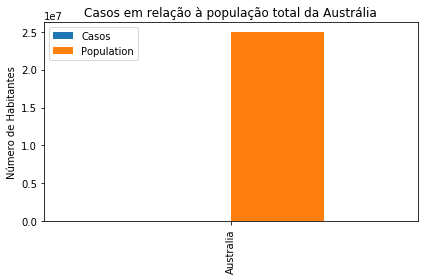

In [26]:
my_df = csv_covid_country.plot(x="Nome", y=["Casos", "Population"], kind="bar")

ax = my_df.plot(kind="bar")
my_df.plot(kind="bar", ax=ax, color="C2")

plt.xlabel('')
plt.ylabel('Número de Habitantes')
plt.title('Casos em relação à população total da Austrália')
plt.savefig('C:/Windows/System32/0 SIG/Imagens/Australian_Cases_Country.png', dpi=200, format='png')
plt.tight_layout()

plt.show()

In [27]:
time_conf = read_csv(r'C:\Windows\System32\0 SIG\Datasets\time_series_covid19_confirmed_global_AUS.csv')
time_rec = read_csv(r'C:\Windows\System32\0 SIG\Datasets\time_series_covid19_recovered_global_AUS.csv')
time_d = read_csv(r'C:\Windows\System32\0 SIG\Datasets\time_series_covid19_deaths_global_AUS.csv')

print(time_conf)
print(time_rec)
print(time_d)

                 Province/State Country/Region      Lat      Long  1/22/20  \
0  Australian Capital Territory      Australia -35.4735  149.0124        0   
1               New South Wales      Australia -33.8688  151.2093        0   
2            Northern Territory      Australia -12.4634  130.8456        0   
3                    Queensland      Australia -28.0167  153.4000        0   
4               South Australia      Australia -34.9285  138.6007        0   
5                      Tasmania      Australia -41.4545  145.9707        0   
6                      Victoria      Australia -37.8136  144.9631        0   
7             Western Australia      Australia -31.9505  115.8605        0   

   1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  5/19/20  5/20/20  \
0        0        0        0        0        0  ...      107      107   
1        0        0        0        3        4  ...     3081     3082   
2        0        0        0        0        0  ...       29       29   
3    

In [28]:
time_conf_transposed = time_conf.set_index('Province/State').T
time_conf_2 = time_conf_transposed.drop(['Country/Region','Lat', 'Long'])
print(time_conf_2)

Province/State Australian Capital Territory New South Wales  \
1/22/20                                   0               0   
1/23/20                                   0               0   
1/24/20                                   0               0   
1/25/20                                   0               0   
1/26/20                                   0               3   
...                                     ...             ...   
5/24/20                                 107            3090   
5/25/20                                 107            3092   
5/26/20                                 107            3089   
5/27/20                                 107            3090   
5/28/20                                 107            3092   

Province/State Northern Territory Queensland South Australia Tasmania  \
1/22/20                         0          0               0        0   
1/23/20                         0          0               0        0   
1/24/20                 

In [29]:
col = time_conf_2.columns.values.tolist()
print(col)

['Australian Capital Territory', 'New South Wales', 'Northern Territory', 'Queensland', 'South Australia', 'Tasmania', 'Victoria', 'Western Australia']


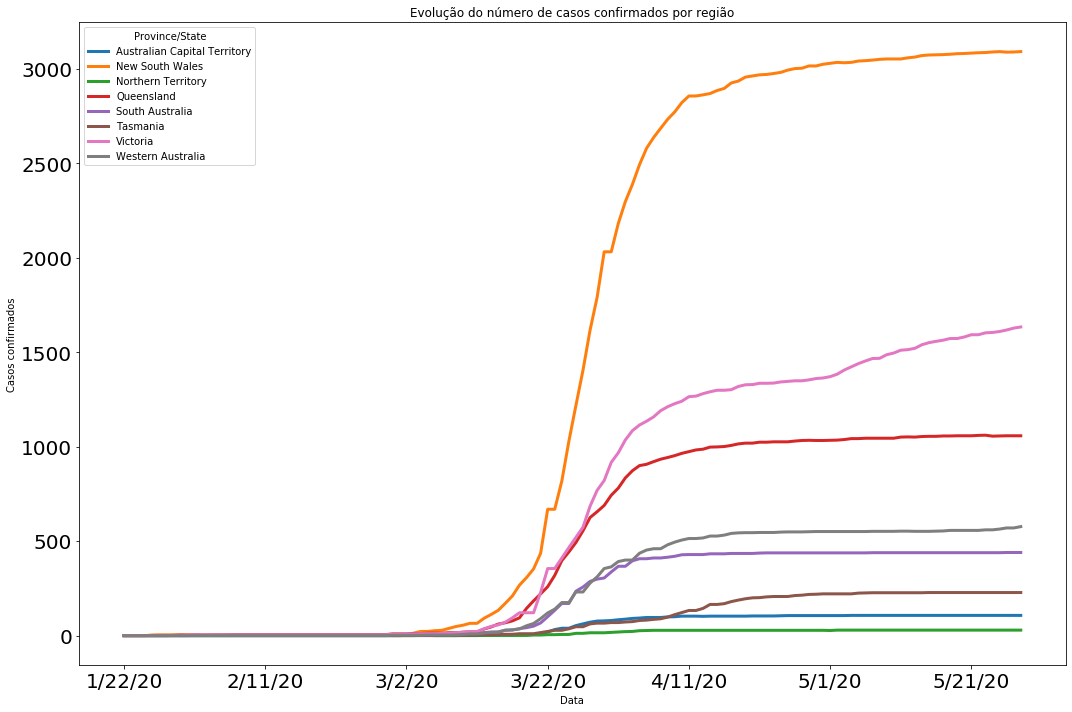

In [30]:
time_conf_2.plot(y=col, use_index=True, linewidth=3, fontsize=20, figsize=(15,10))

plt.xlabel('Data')
plt.ylabel('Casos confirmados')
plt.title('Evolução do número de casos confirmados por região')
plt.savefig('C:/Windows/System32/0 SIG/Imagens/Australian_Cases_Region_Evolution_Confirmed.png', dpi=200, format='png')
plt.tight_layout()

plt.show()

In [31]:
time_rec_transposed = time_rec.set_index('Province/State').T
time_rec_2 = time_rec_transposed.drop(['Country/Region','Lat', 'Long'])
print(time_rec_2)

Province/State Australian Capital Territory New South Wales  \
1/22/20                                   0               0   
1/23/20                                   0               0   
1/24/20                                   0               0   
1/25/20                                   0               0   
1/26/20                                   0               0   
...                                     ...             ...   
5/24/20                                 104            2656   
5/25/20                                 104            2661   
5/26/20                                 104            2663   
5/27/20                                 104            2670   
5/28/20                                 104            2666   

Province/State Northern Territory Queensland South Australia Tasmania  \
1/22/20                         0          0               0        0   
1/23/20                         0          0               0        0   
1/24/20                 

In [32]:
col2 = time_rec_2.columns.values.tolist()
print(col2)

['Australian Capital Territory', 'New South Wales', 'Northern Territory', 'Queensland', 'South Australia', 'Tasmania', 'Victoria', 'Western Australia']


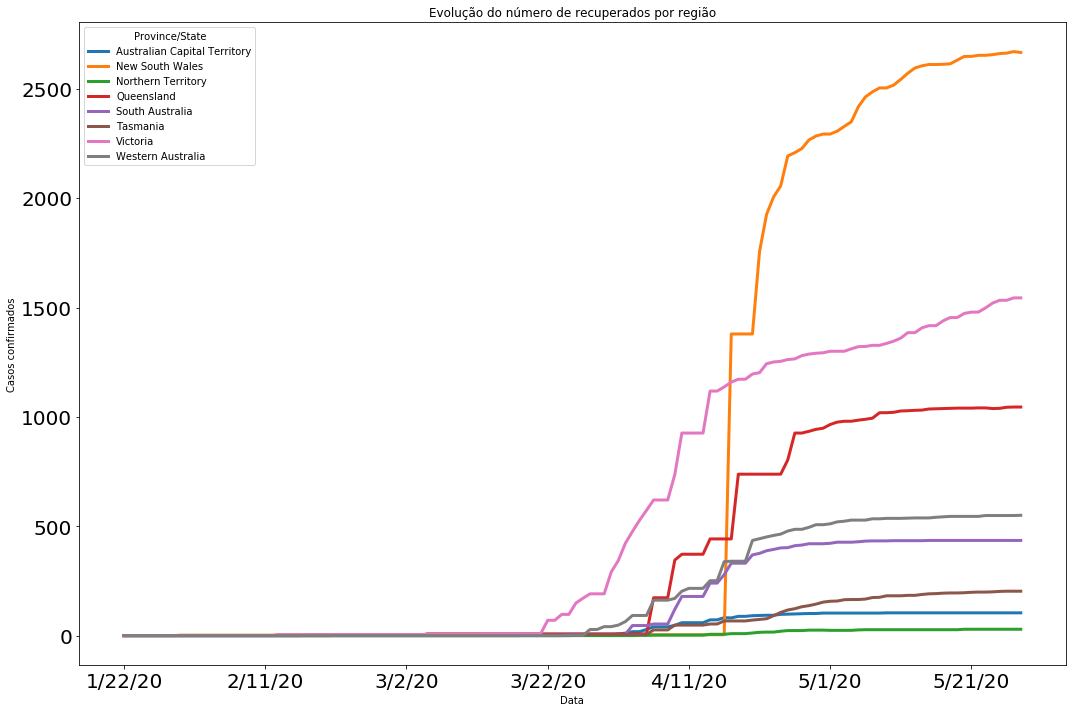

In [33]:
time_rec_2.plot(y=col2, use_index=True, linewidth=3, fontsize=20, figsize=(15,10))

plt.xlabel('Data')
plt.ylabel('Casos confirmados')
plt.title('Evolução do número de recuperados por região')
plt.savefig('C:/Windows/System32/0 SIG/Imagens/Australian_Cases_Region_Evolution_Recovered.png', dpi=200, format='png')
plt.tight_layout()

plt.show()

In [34]:
time_d_transposed = time_d.set_index('Province/State').T
time_d_2 = time_d_transposed.drop(['Country/Region','Lat', 'Long'])
print(time_d_2)

Province/State Australian Capital Territory New South Wales  \
1/22/20                                   0               0   
1/23/20                                   0               0   
1/24/20                                   0               0   
1/25/20                                   0               0   
1/26/20                                   0               0   
...                                     ...             ...   
5/24/20                                   3              48   
5/25/20                                   3              48   
5/26/20                                   3              48   
5/27/20                                   3              48   
5/28/20                                   3              48   

Province/State Northern Territory Queensland South Australia Tasmania  \
1/22/20                         0          0               0        0   
1/23/20                         0          0               0        0   
1/24/20                 

In [35]:
col3 = time_d_2.columns.values.tolist()
print(col3)

['Australian Capital Territory', 'New South Wales', 'Northern Territory', 'Queensland', 'South Australia', 'Tasmania', 'Victoria', 'Western Australia']


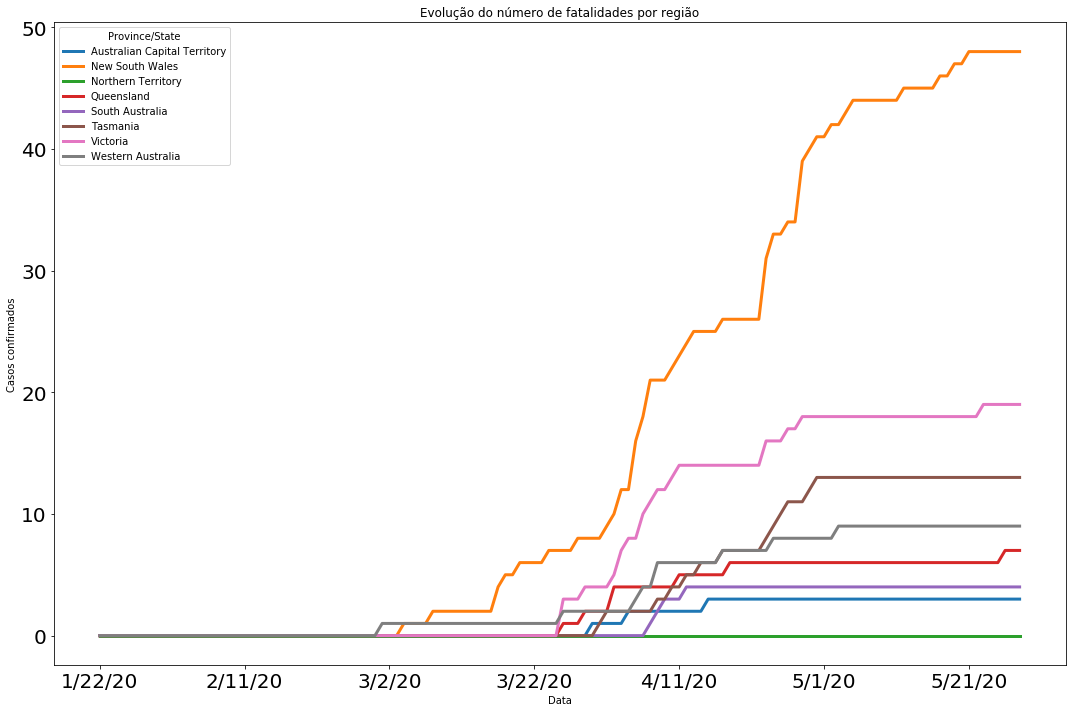

In [36]:
time_d_2.plot(y=col3, use_index=True, linewidth=3, fontsize=20, figsize=(15,10))

plt.xlabel('Data')
plt.ylabel('Casos confirmados')
plt.title('Evolução do número de fatalidades por região')
plt.savefig('C:/Windows/System32/0 SIG/Imagens/Australian_Cases_Region_Evolution_Deaths.png', dpi=200, format='png')
plt.tight_layout()

plt.show()

In [37]:
time = read_csv(r'C:\Windows\System32\0 SIG\Datasets\time_series_covid19_global_AUS.csv')

print(time)

     Total_Confirmados  Total_Recuperados  Total_Fatalidades     Data
0                  0.0                0.0                0.0  1/22/20
1                  0.0                0.0                0.0  1/23/20
2                  0.0                0.0                0.0  1/24/20
3                  0.0                0.0                0.0  1/25/20
4                  1.0                0.0                0.0  1/26/20
..                 ...                ...                ...      ...
123             2393.0             2269.0               41.0  5/24/20
124             2402.0             2284.0               41.0  5/25/20
125             2416.0             2285.0               41.0  5/26/20
126             2426.0             2296.0               41.0  5/27/20
127             2439.0             2297.0               41.0  5/28/20

[128 rows x 4 columns]


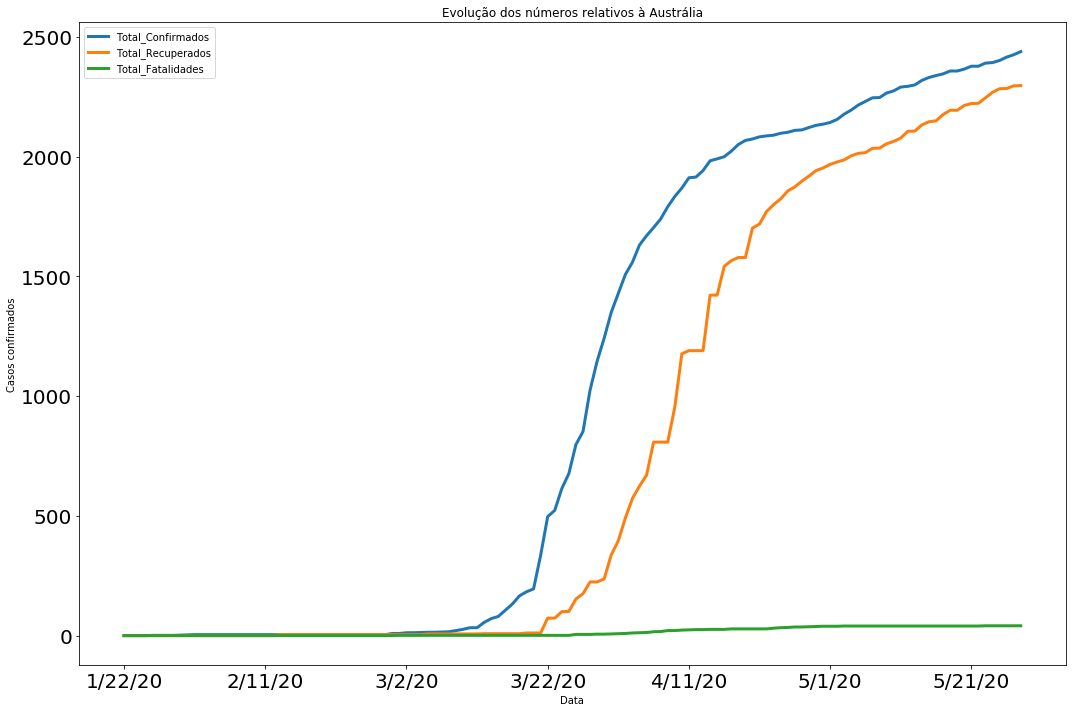

In [38]:
time.plot(x='Data', y=['Total_Confirmados','Total_Recuperados','Total_Fatalidades'], linewidth=3, fontsize=20, figsize=(15,10))

plt.xlabel('Data')
plt.ylabel('Casos confirmados')
plt.title('Evolução dos números relativos à Austrália')
plt.savefig('C:/Windows/System32/0 SIG/Imagens/Australian_Cases_Australia_Evolution.png', dpi=200, format='png')
plt.tight_layout()

plt.show()

In [39]:
rolling = time.rolling(window=3, min_periods=1)

rolling_mean = rolling.mean()
rolling_mean['Data'] = time['Data']

rolling_std = rolling.std()
rolling_std['Data'] = time['Data']

print(time)
print(rolling_mean)

     Total_Confirmados  Total_Recuperados  Total_Fatalidades     Data
0                  0.0                0.0                0.0  1/22/20
1                  0.0                0.0                0.0  1/23/20
2                  0.0                0.0                0.0  1/24/20
3                  0.0                0.0                0.0  1/25/20
4                  1.0                0.0                0.0  1/26/20
..                 ...                ...                ...      ...
123             2393.0             2269.0               41.0  5/24/20
124             2402.0             2284.0               41.0  5/25/20
125             2416.0             2285.0               41.0  5/26/20
126             2426.0             2296.0               41.0  5/27/20
127             2439.0             2297.0               41.0  5/28/20

[128 rows x 4 columns]
     Total_Confirmados  Total_Recuperados  Total_Fatalidades     Data
0             0.000000           0.000000           0.000000  1/22

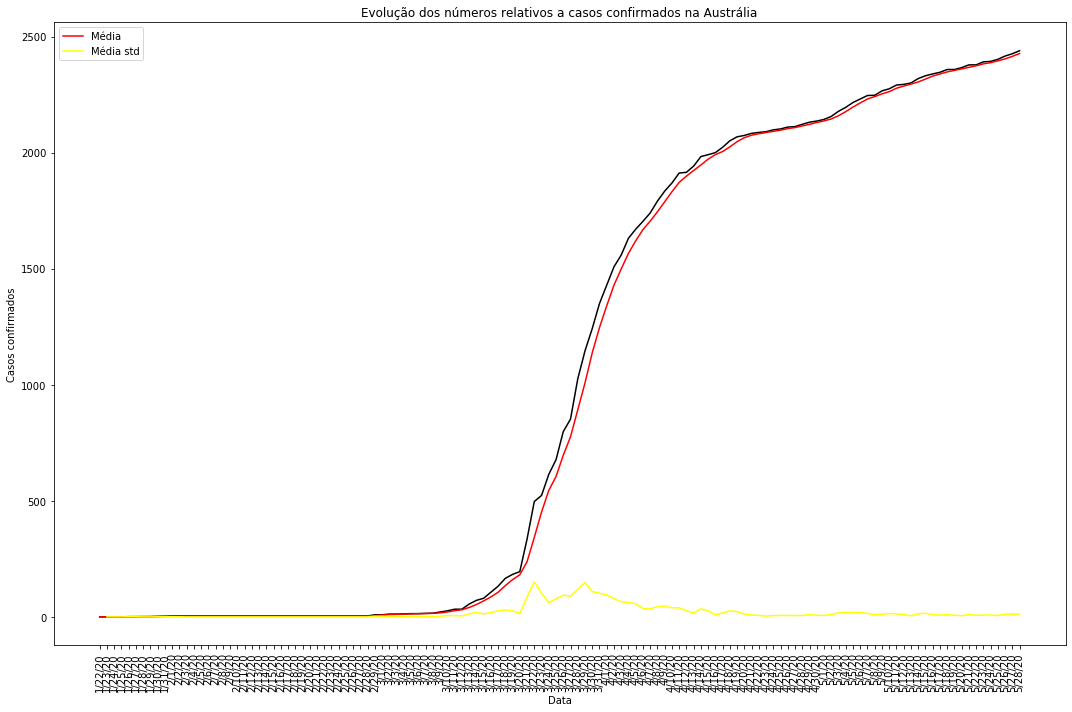

In [40]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(time["Data"], time["Total_Confirmados"], color="black")
ax.plot(rolling_mean["Data"], rolling_mean["Total_Confirmados"], label="Média", color="red")
ax.plot(rolling_std["Data"], rolling_std["Total_Confirmados"], label="Média std", color="yellow")

ax.legend()

plt.xticks(time["Data"],rotation=90)
plt.xlabel('Data')
plt.ylabel('Casos confirmados')
plt.title('Evolução dos números relativos a casos confirmados na Austrália')
plt.savefig('C:/Windows/System32/0 SIG/Imagens/Australian_Cases_Australia_Evolution_Confirmed.png', dpi=200, format='png')
plt.tight_layout()

plt.show()

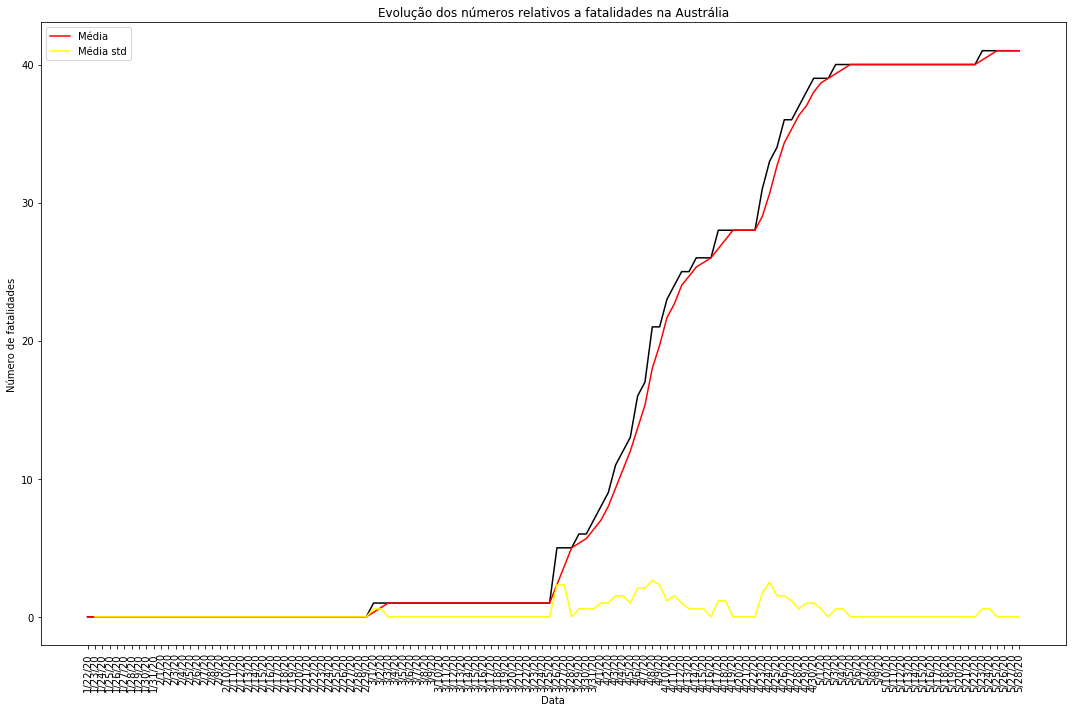

In [41]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(time["Data"], time["Total_Fatalidades"], color="black")
ax.plot(rolling_mean["Data"], rolling_mean["Total_Fatalidades"], label="Média", color="red")
ax.plot(rolling_std["Data"], rolling_std["Total_Fatalidades"], label="Média std", color="yellow")

ax.legend()
plt.xticks(time["Data"],rotation=90)
plt.xlabel('Data')
plt.ylabel('Número de fatalidades')
plt.title('Evolução dos números relativos a fatalidades na Austrália')
plt.savefig('C:/Windows/System32/0 SIG/Imagens/Australian_Cases_Australia_Evolution_Deaths_Forecasting.png', dpi=200, format='png')
plt.tight_layout()

plt.show()

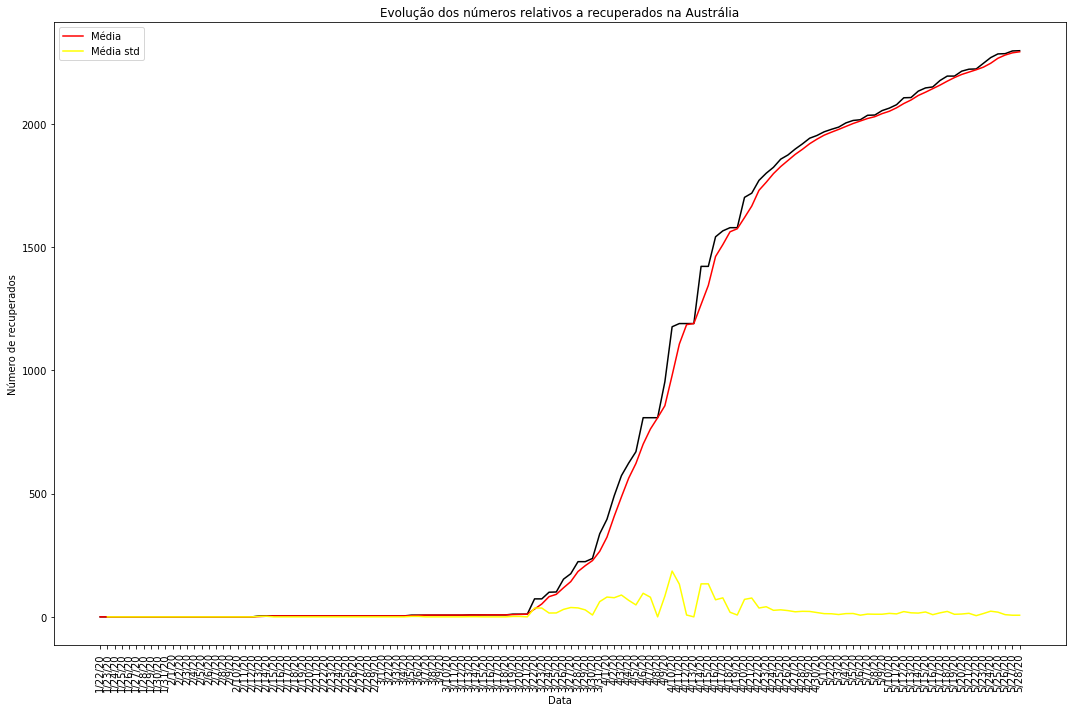

In [42]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(time["Data"], time["Total_Recuperados"], color="black")
ax.plot(rolling_mean["Data"], rolling_mean["Total_Recuperados"], label="Média", color="red")
ax.plot(rolling_std["Data"], rolling_std["Total_Recuperados"], label="Média std", color="yellow")

ax.legend()
plt.xticks(time["Data"],rotation=90)
plt.xlabel('Data')
plt.ylabel('Número de recuperados')
plt.title('Evolução dos números relativos a recuperados na Austrália')
plt.savefig('C:/Windows/System32/0 SIG/Imagens/Australian_Cases_Australia_Evolution_Recovered_Forecasting.png', dpi=200, format='png')
plt.tight_layout()

plt.show()

In [43]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\osgeo4~1\bin\python3.exe -m pip install --upgrade pip' command.


In [44]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 9.0, 9.0, 12.0, 12.0, 13.0, 14.0, 14.0, 15.0, 16.0, 21.0, 26.0, 33.0, 33.0, 55.0, 71.0, 80.0, 106.0, 132.0, 166.0, 183.0, 195.0, 335.0, 497.0, 523.0, 614.0, 677.0, 798.0, 852.0, 1025.0, 1146.0, 1242.0, 1350.0, 1429.0, 1508.0, 1559.0, 1631.0, 1670.0, 1704.0, 1740.0, 1791.0, 1834.0, 1869.0, 1912.0, 1915.0, 1942.0, 1983.0, 1991.0, 2000.0, 2023.0, 2051.0, 2068.0, 2074.0, 2083.0, 2087.0, 2090.0, 2098.0, 2102.0, 2110.0, 2112.0, 2122.0, 2131.0, 2136.0, 2143.0, 2156.0, 2178.0, 2195.0, 2216.0, 2231.0, 2246.0, 2247.0, 2266.0, 2275.0, 2291.0, 2294.0, 2300.0, 2319.0, 2331.0, 2339.0, 2346.0, 2358.0, 2358.0, 2366.0, 2378.0, 2378.0, 2391.0, 2393.0, 2402.0, 2416.0, 2426.0, 2439.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0,

C:\OSGEO4~1\apps\Python37\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


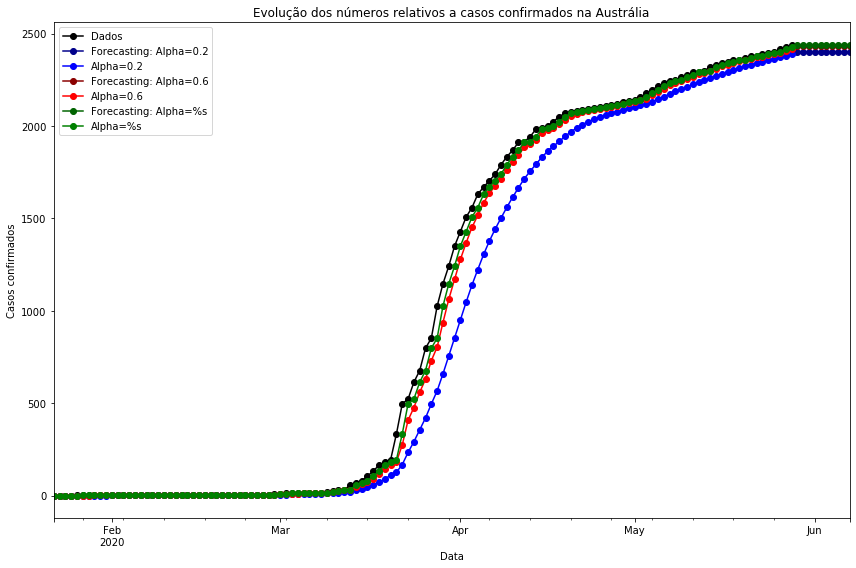

In [45]:
lst = list(time["Total_Confirmados"])

print(lst)

ind = pd.DatetimeIndex(time["Data"]).to_period('D')

print(lst)

data = pd.Series(lst, index=ind)

print(data)
x1, x2, y1, y2 = '2020-05-20', '2020-05-31', 2000, 2500 # specify the limits

from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(10).rename(r'$\alpha=0.2$')

fit2 = SimpleExpSmoothing(data).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(10).rename(r'$\alpha=0.6$')

fit3 = SimpleExpSmoothing(data).fit()
fcast3 = fit3.forecast(10).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

ax = data.plot(marker='o', color='black', figsize=(12,8))

fcast1.plot(marker='o', ax=ax, color='darkblue', legend=True)
fit1.fittedvalues.plot(marker='o', ax=ax, color='blue')

fcast2.plot(marker='o', ax=ax, color='darkred', legend=True)
fit2.fittedvalues.plot(marker='o', ax=ax, color='red')

fcast3.plot(marker='o', ax=ax, color='darkgreen', legend=True)
fit3.fittedvalues.plot(marker='o', ax=ax, color='green')

#from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
#axins = zoomed_inset_axes(ax, 2.5, loc=2)

# Make the zoom-in plot:
#axins = zoomed_inset_axes(ax, 2, loc=1) # zoom = 2
#axins.plot(time["Data"])
#axins.set_xlim(x1, x2)
#axins.set_ylim(y1, y2)
#plt.xticks(visible=False)
#plt.yticks(visible=False)
#mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

#plt.xticks(time["Data"],rotation=90)

plt.legend(["Dados", "Forecasting: Alpha=0.2", "Alpha=0.2", "Forecasting: Alpha=0.6", "Alpha=0.6", "Forecasting: Alpha=%s", "Alpha=%s"]);

plt.xlabel('Data')
plt.ylabel('Casos confirmados')
plt.title('Evolução dos números relativos a casos confirmados na Austrália')
plt.savefig('C:/Windows/System32/0 SIG/Imagens/Australian_Cases_Australia_Evolution_Confirmed_Forecasting.png', dpi=200, format='png')
plt.tight_layout()

plt.show()

Data
2020-01-22     0.0
2020-01-23     0.0
2020-01-24     0.0
2020-01-25     0.0
2020-01-26     0.0
              ... 
2020-05-24    41.0
2020-05-25    41.0
2020-05-26    41.0
2020-05-27    41.0
2020-05-28    41.0
Freq: D, Length: 128, dtype: float64


C:\OSGEO4~1\apps\Python37\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


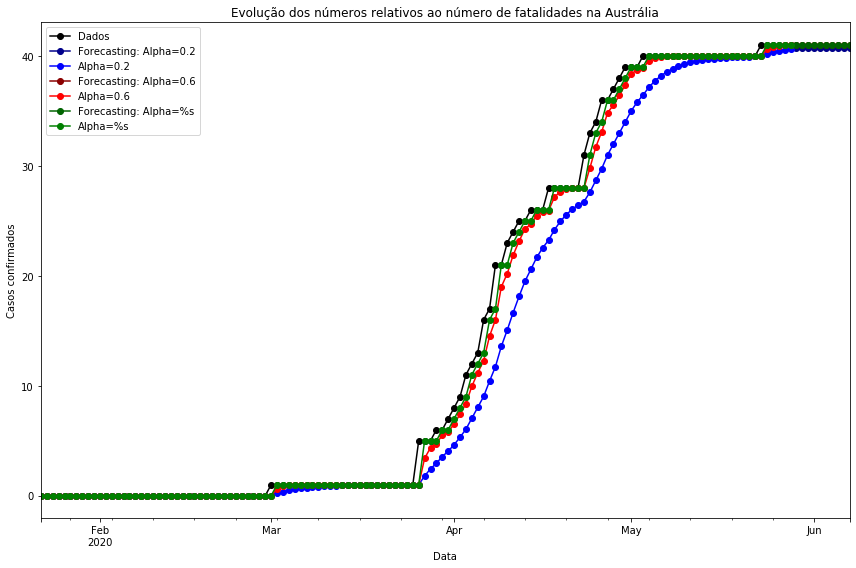

In [46]:
lst = list(time["Total_Fatalidades"])
ind = pd.DatetimeIndex(time["Data"]).to_period('D')

data = pd.Series(lst, index=ind)

print(data)
x1, x2, y1, y2 = '2020-05-20', '2020-05-31', 2000, 2500 # specify the limits

from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(10).rename(r'$\alpha=0.2$')

fit2 = SimpleExpSmoothing(data).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(10).rename(r'$\alpha=0.6$')

fit3 = SimpleExpSmoothing(data).fit()
fcast3 = fit3.forecast(10).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

ax = data.plot(marker='o', color='black', figsize=(12,8))

fcast1.plot(marker='o', ax=ax, color='darkblue', legend=True)
fit1.fittedvalues.plot(marker='o', ax=ax, color='blue')

fcast2.plot(marker='o', ax=ax, color='darkred', legend=True)
fit2.fittedvalues.plot(marker='o', ax=ax, color='red')

fcast3.plot(marker='o', ax=ax, color='darkgreen', legend=True)
fit3.fittedvalues.plot(marker='o', ax=ax, color='green')

plt.legend(["Dados", "Forecasting: Alpha=0.2", "Alpha=0.2", "Forecasting: Alpha=0.6", "Alpha=0.6", "Forecasting: Alpha=%s", "Alpha=%s"]);
plt.xlabel('Data')
plt.ylabel('Casos confirmados')
plt.title('Evolução dos números relativos ao número de fatalidades na Austrália')
plt.savefig('C:/Windows/System32/0 SIG/Imagens/Australian_Cases_Australia_Evolution_Deaths_Forecasting.png', dpi=200, format='png')
plt.tight_layout()

plt.show()

Data
2020-01-22       0.0
2020-01-23       0.0
2020-01-24       0.0
2020-01-25       0.0
2020-01-26       0.0
               ...  
2020-05-24    2269.0
2020-05-25    2284.0
2020-05-26    2285.0
2020-05-27    2296.0
2020-05-28    2297.0
Freq: D, Length: 128, dtype: float64


C:\OSGEO4~1\apps\Python37\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


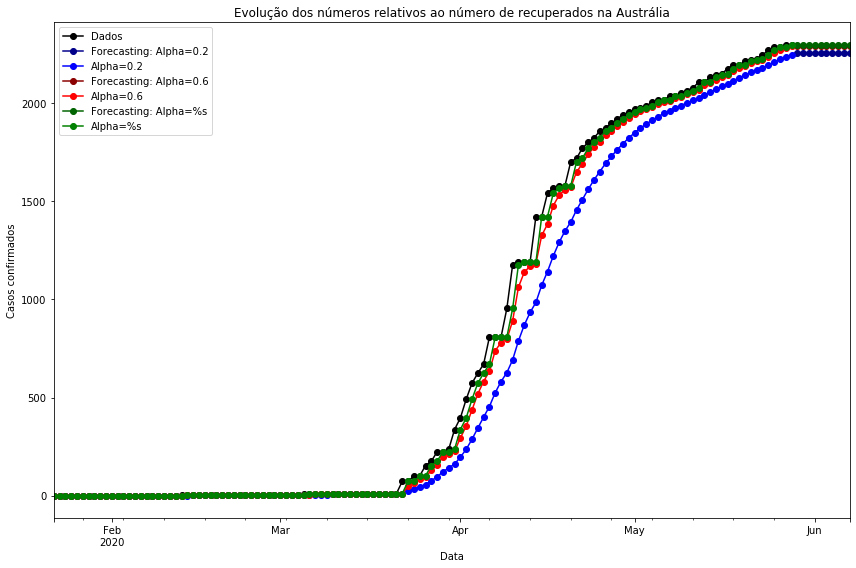

In [47]:
lst = list(time["Total_Recuperados"])
ind = pd.DatetimeIndex(time["Data"]).to_period('D')

data = pd.Series(lst, index=ind)

print(data)
x1, x2, y1, y2 = '2020-05-20', '2020-05-31', 2000, 2500 # specify the limits

from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(10).rename(r'$\alpha=0.2$')

fit2 = SimpleExpSmoothing(data).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(10).rename(r'$\alpha=0.6$')

fit3 = SimpleExpSmoothing(data).fit()
fcast3 = fit3.forecast(10).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

ax = data.plot(marker='o', color='black', figsize=(12,8))

fcast1.plot(marker='o', ax=ax, color='darkblue', legend=True)
fit1.fittedvalues.plot(marker='o', ax=ax, color='blue')

fcast2.plot(marker='o', ax=ax, color='darkred', legend=True)
fit2.fittedvalues.plot(marker='o', ax=ax, color='red')

fcast3.plot(marker='o', ax=ax, color='darkgreen', legend=True)
fit3.fittedvalues.plot(marker='o', ax=ax, color='green')

plt.legend(["Dados", "Forecasting: Alpha=0.2", "Alpha=0.2", "Forecasting: Alpha=0.6", "Alpha=0.6", "Forecasting: Alpha=%s", "Alpha=%s"]);
plt.xlabel('Data')
plt.ylabel('Casos confirmados')
plt.title('Evolução dos números relativos ao número de recuperados na Austrália')
plt.savefig('C:/Windows/System32/0 SIG/Imagens/Australian_Cases_Australia_Evolution_Recovered_Forecasting.png', dpi=200, format='png')
plt.tight_layout()

plt.show()

[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 9.0, 9.0, 12.0, 12.0, 13.0, 14.0, 14.0, 15.0, 16.0, 21.0, 26.0, 33.0, 33.0, 55.0, 71.0, 80.0, 106.0, 132.0, 166.0, 183.0, 195.0, 335.0, 497.0, 523.0, 614.0, 677.0, 798.0, 852.0, 1025.0, 1146.0, 1242.0, 1350.0, 1429.0, 1508.0, 1559.0, 1631.0, 1670.0, 1704.0, 1740.0, 1791.0, 1834.0, 1869.0, 1912.0, 1915.0, 1942.0, 1983.0, 1991.0, 2000.0, 2023.0, 2051.0, 2068.0, 2074.0, 2083.0, 2087.0, 2090.0, 2098.0, 2102.0, 2110.0, 2112.0, 2122.0, 2131.0, 2136.0, 2143.0, 2156.0, 2178.0, 2195.0, 2216.0, 2231.0, 2246.0, 2247.0, 2266.0, 2275.0, 2291.0, 2294.0, 2300.0, 2319.0, 2331.0, 2339.0, 2346.0, 2358.0, 2358.0, 2366.0, 2378.0, 2378.0, 2391.0, 2393.0, 2402.0, 2416.0, 2426.0, 2439.0]
Data
2020-01-22       0.0
2020-01-23       0.0
2020-01-24       0.0
2020-01-25       0.0
2020-01-26       1.0
               ...  
2020

C:\OSGEO4~1\apps\Python37\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


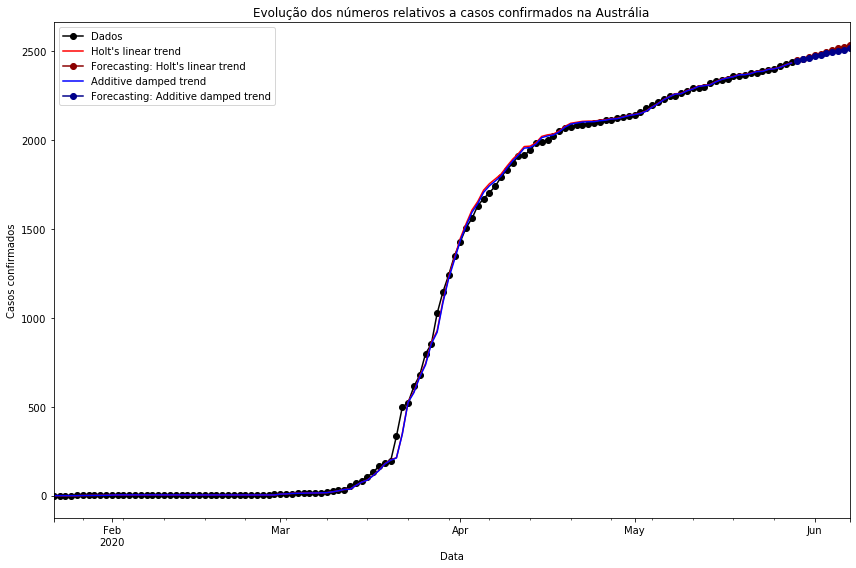

In [48]:
lst = list(time["Total_Confirmados"])
ind = pd.DatetimeIndex(time["Data"]).to_period('D')

print(lst)

data = pd.Series(lst, index=ind)

print(data)

fit1 = Holt(data).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(10).rename("Holt's linear trend")

#fit2 = Holt(data, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
#fcast2 = fit2.forecast(5).rename("Exponential trend")

fit3 = Holt(data, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(10).rename("Additive damped trend")

ax = data.plot(color="black", marker="o", figsize=(12,8))

fit1.fittedvalues.plot(ax=ax, color='red')
fcast1.plot(ax=ax, color='darkred', marker="o", legend=True)

#fit2.fittedvalues.plot(ax=ax, color='red')
#fcast2.plot(ax=ax, color='darkred', marker="o", legend=True)

fit3.fittedvalues.plot(ax=ax, color='blue')
fcast3.plot(ax=ax, color='darkblue', marker="o", legend=True)

plt.legend(["Dados", "Holt's linear trend", "Forecasting: Holt's linear trend", "Additive damped trend", "Forecasting: Additive damped trend"]);
plt.xlabel('Data')
plt.ylabel('Casos confirmados')
plt.title('Evolução dos números relativos a casos confirmados na Austrália')
plt.savefig('C:/Windows/System32/0 SIG/Imagens/Australian_Cases_Australia_Evolution_Confirmed_Forecasting_Model.png', dpi=200, format='png')
plt.tight_layout()

plt.show()

C:\OSGEO4~1\apps\Python37\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


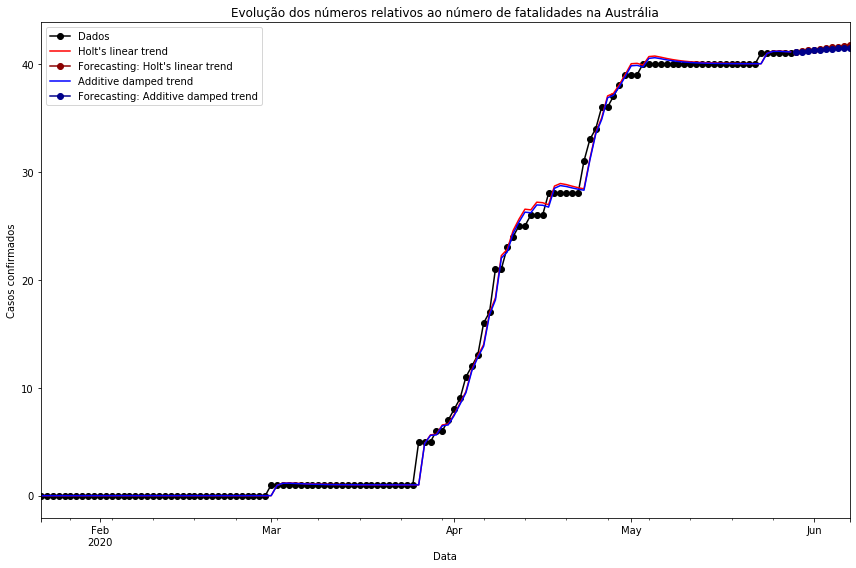

In [49]:
lst = list(time["Total_Fatalidades"])
ind = pd.DatetimeIndex(time["Data"]).to_period('D')

data = pd.Series(lst, index=ind)

fit1 = Holt(data).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(10).rename("Holt's linear trend")

#fit2 = Holt(data, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
#fcast2 = fit2.forecast(5).rename("Exponential trend")

fit3 = Holt(data, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(10).rename("Additive damped trend")

ax = data.plot(color="black", marker="o", figsize=(12,8))

fit1.fittedvalues.plot(ax=ax, color='red')
fcast1.plot(ax=ax, color='darkred', marker="o", legend=True)

#fit2.fittedvalues.plot(ax=ax, color='red')
#fcast2.plot(ax=ax, color='darkred', marker="o", legend=True)

fit3.fittedvalues.plot(ax=ax, color='blue')
fcast3.plot(ax=ax, color='darkblue', marker="o", legend=True)

plt.legend(["Dados", "Holt's linear trend", "Forecasting: Holt's linear trend", "Additive damped trend", "Forecasting: Additive damped trend"]);
plt.xlabel('Data')
plt.ylabel('Casos confirmados')
plt.title('Evolução dos números relativos ao número de fatalidades na Austrália')
plt.savefig('C:/Windows/System32/0 SIG/Imagens/Australian_Cases_Australia_Evolution_Deaths_Forecasting_Model.png', dpi=200, format='png')
plt.tight_layout()

plt.show()

C:\OSGEO4~1\apps\Python37\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


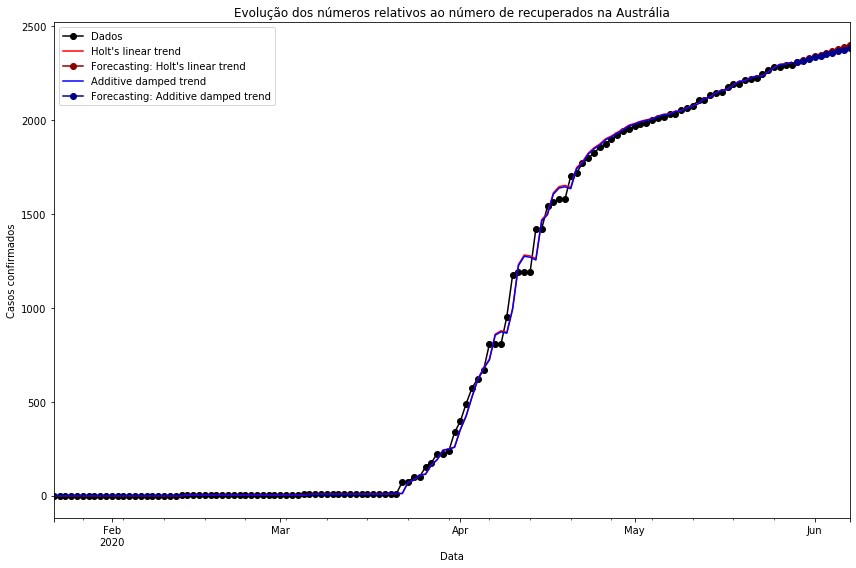

In [50]:
lst = list(time["Total_Recuperados"])
ind = pd.DatetimeIndex(time["Data"]).to_period('D')

data = pd.Series(lst, index=ind)

fit1 = Holt(data).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(10).rename("Holt's linear trend")

#fit2 = Holt(data, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
#fcast2 = fit2.forecast(5).rename("Exponential trend")

fit3 = Holt(data, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(10).rename("Additive damped trend")

ax = data.plot(color="black", marker="o", figsize=(12,8))

fit1.fittedvalues.plot(ax=ax, color='red')
fcast1.plot(ax=ax, color='darkred', marker="o", legend=True)

#fit2.fittedvalues.plot(ax=ax, color='red')
#fcast2.plot(ax=ax, color='darkred', marker="o", legend=True)

fit3.fittedvalues.plot(ax=ax, color='blue')
fcast3.plot(ax=ax, color='darkblue', marker="o", legend=True)

plt.legend(["Dados", "Holt's linear trend", "Forecasting: Holt's linear trend", "Additive damped trend", "Forecasting: Additive damped trend"]);
plt.xlabel('Data')
plt.ylabel('Casos confirmados')
plt.title('Evolução dos números relativos ao número de recuperados na Austrália')
plt.savefig('C:/Windows/System32/0 SIG/Imagens/Australian_Cases_Australia_Evolution_Recovered_Forecasting_Model.png', dpi=200, format='png')
plt.tight_layout()

plt.show()

In [51]:
## create new cases column
time["Novos_Confirmados"] = time["Total_Confirmados"] - time["Total_Confirmados"].shift(1)
time["Novos_Confirmados"] = time["Novos_Confirmados"].fillna(method='bfill')

time["Novas_Fatalidades"] = time["Total_Fatalidades"] - time["Total_Fatalidades"].shift(1)
time["Novas_Fatalidades"] = time["Novas_Fatalidades"].fillna(method='bfill')

time["Novos_Recuperados"] = time["Total_Recuperados"] - time["Total_Recuperados"].shift(1)
time["Novos_Recuperados"] = time["Novos_Recuperados"].fillna(method='bfill')

print(time)

     Total_Confirmados  Total_Recuperados  Total_Fatalidades     Data  \
0                  0.0                0.0                0.0  1/22/20   
1                  0.0                0.0                0.0  1/23/20   
2                  0.0                0.0                0.0  1/24/20   
3                  0.0                0.0                0.0  1/25/20   
4                  1.0                0.0                0.0  1/26/20   
..                 ...                ...                ...      ...   
123             2393.0             2269.0               41.0  5/24/20   
124             2402.0             2284.0               41.0  5/25/20   
125             2416.0             2285.0               41.0  5/26/20   
126             2426.0             2296.0               41.0  5/27/20   
127             2439.0             2297.0               41.0  5/28/20   

     Novos_Confirmados  Novas_Fatalidades  Novos_Recuperados  
0                  0.0                0.0                0.0

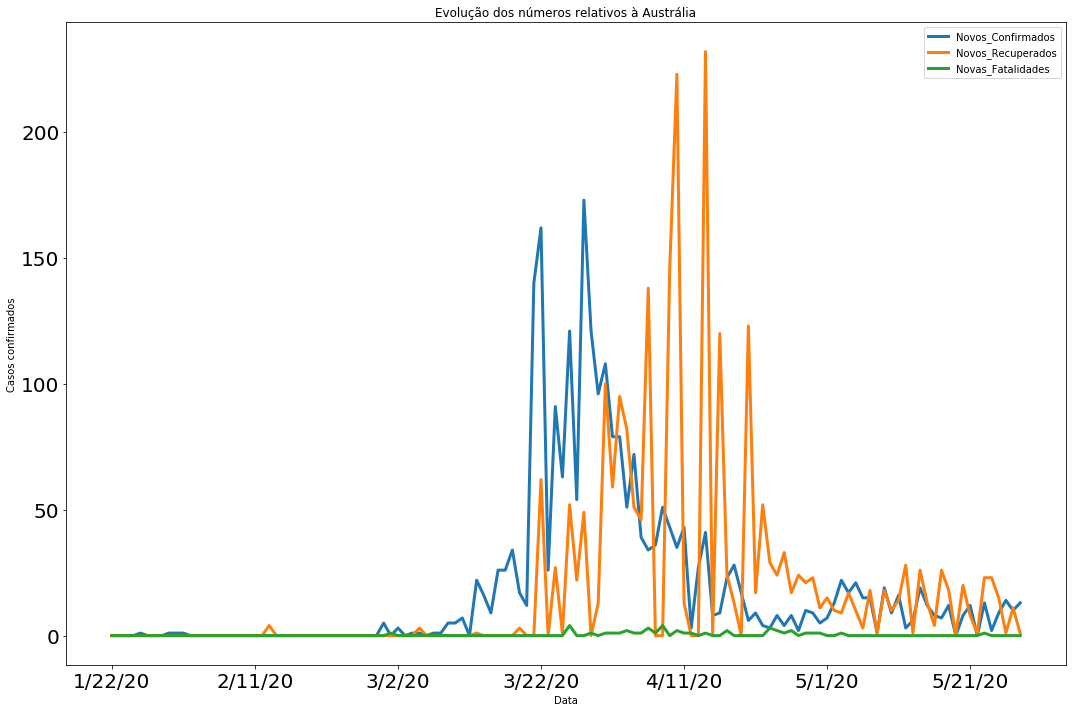

In [52]:
time.plot(x='Data', y=['Novos_Confirmados','Novos_Recuperados','Novas_Fatalidades'], linewidth=3, fontsize=20, figsize=(15,10))

plt.xlabel('Data')
plt.ylabel('Casos confirmados')
plt.title('Evolução dos números relativos à Austrália')
plt.savefig('C:/Windows/System32/0 SIG/Imagens/Australian_Cases_Australia_New.png', dpi=200, format='png')
plt.tight_layout()

plt.show()